In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
# Import transformed data
housing_df = pd.read_csv('./resources/CA_HousingDataset_Transformed.csv')
housing_df.head()

,Latitude,Longitude,ZipCode,MedInc,MedInc_Bins,MedInc_SQRT,MedInc_LN,HouseAge,HouseAge_Bins,HouseAge_SQRT,...,TotalBedrms_LN,TR_Pop,TR_Pop_Bins,TR_Pop_SQRT,TR_Pop_LN,BR_Pop,BR_Pop_Bins,BR_Pop_SQRT,BR_Pop_LN,TARGET
0,-122.23,37.88,94720,8.3252,100,2.885342,2.119287,41,80,6.403124,...,4.859812,2.732919,90,1.653154,1.005370,0.400621,60,0.632946,-0.914739,4.526
1,-122.22,37.86,94611,8.3014,100,2.881215,2.116424,21,30,4.582576,...,7.008505,2.956685,100,1.719501,1.084069,0.460641,80,0.678706,-0.775135,3.585
2,-122.24,37.85,94611,7.2574,90,2.693956,1.982022,52,90,7.211103,...,5.247024,2.957661,100,1.719785,1.084399,0.383065,50,0.618922,-0.959552,3.521
3,-122.25,37.85,94611,5.6431,90,2.375521,1.730434,52,90,7.211103,...,5.459586,2.283154,70,1.511011,0.825558,0.421147,70,0.648958,-0.864773,3.413
4,-122.25,37.85,94611,3.8462,60,1.961173,1.347086,52,90,7.211103,...,5.634790,2.879646,90,1.696952,1.057667,0.495575,80,0.703971,-0.702036,3.422


In [3]:
# Review summary statistics 
housing_df.describe()

,Latitude,Longitude,ZipCode,MedInc,MedInc_Bins,MedInc_SQRT,MedInc_LN,HouseAge,HouseAge_Bins,HouseAge_SQRT,...,TotalBedrms_LN,TR_Pop,TR_Pop_Bins,TR_Pop_SQRT,TR_Pop_LN,BR_Pop,BR_Pop_Bins,BR_Pop_SQRT,BR_Pop_LN,TARGET
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,...,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,92882.888469,3.870671,49.999031,1.914874,1.244465,28.639486,48.534399,5.199041,...,6.051034,1.976970,50.000000,1.378087,0.604461,0.403036,50.000000,0.623653,-0.973081,2.068558
std,2.003532,2.135952,3371.163410,1.899822,29.155964,0.451597,0.470653,12.585558,28.435612,1.268675,...,0.732730,1.146020,29.155466,0.279017,0.387493,0.242310,29.155466,0.118717,0.332515,1.153956
min,-124.350000,32.540000,3619.000000,0.499900,0.000000,0.707036,-0.693347,1.000000,0.000000,1.000000,...,0.000000,0.002547,0.000000,0.050467,-5.972872,0.000670,0.000000,0.025889,-7.307873,0.149990
25%,-121.800000,33.930000,91436.000000,2.563400,27.500000,1.601062,0.941334,18.000000,20.000000,4.242641,...,5.686975,1.522382,27.500000,1.233848,0.420276,0.315656,27.500000,0.561833,-1.153101,1.196000
50%,-118.490000,34.260000,92833.000000,3.534800,50.000000,1.880106,1.262657,29.000000,50.000000,5.385165,...,6.075346,1.937936,50.000000,1.392098,0.661623,0.372023,50.000000,0.609937,-0.988800,1.797000
75%,-118.010000,37.710000,94601.000000,4.743250,72.500000,2.177900,1.556723,37.000000,70.000000,6.082763,...,6.472346,2.296090,72.500000,1.515285,0.831208,0.442652,72.500000,0.665321,-0.814971,2.647250
max,-114.310000,41.950000,99597.000000,15.000100,100.000000,3.872996,2.708057,52.000000,90.000000,7.211103,...,8.771060,55.222222,100.000000,7.431166,4.011365,14.194444,100.000000,3.767552,2.652851,5.000010


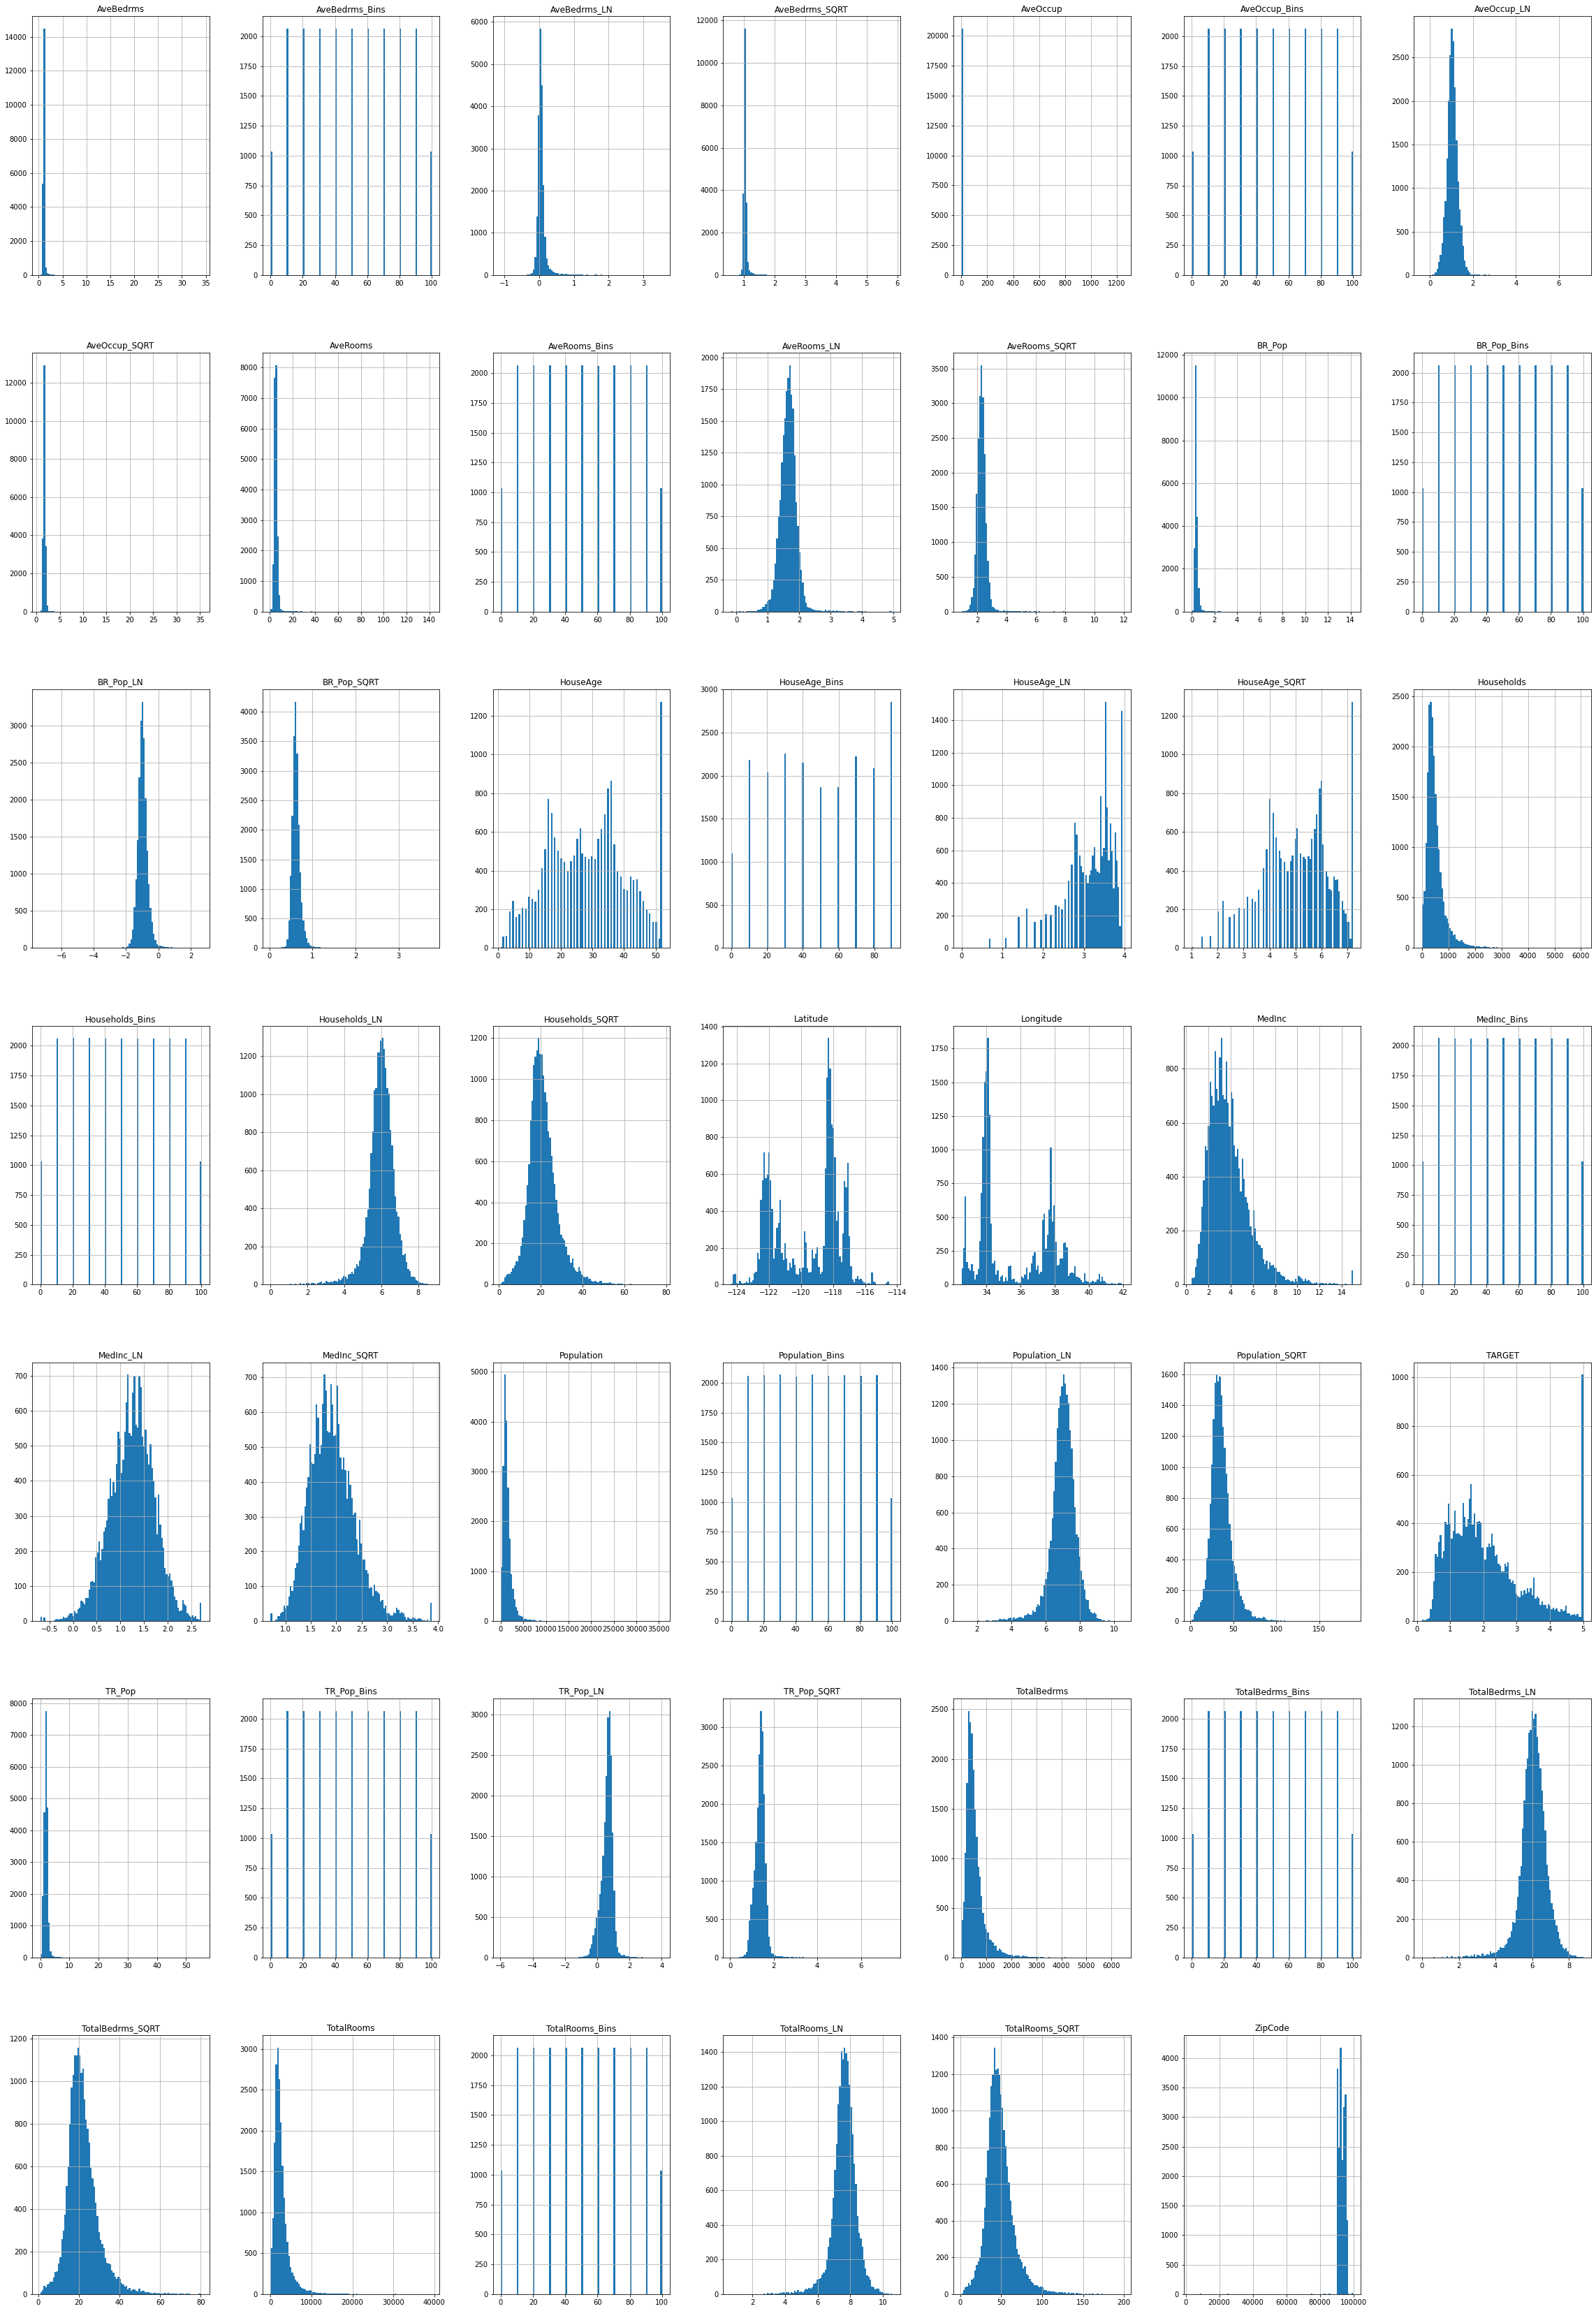

In [4]:
# Plot histograms of all features
housing_df.hist(bins = 100, figsize = (40,60))
plt.show()

In [5]:
# Create correlation matrix of all variables
corr_matrix = housing_df.corr()
corr_matrix

,Latitude,Longitude,ZipCode,MedInc,MedInc_Bins,MedInc_SQRT,MedInc_LN,HouseAge,HouseAge_Bins,HouseAge_SQRT,...,TotalBedrms_LN,TR_Pop,TR_Pop_Bins,TR_Pop_SQRT,TR_Pop_LN,BR_Pop,BR_Pop_Bins,BR_Pop_SQRT,BR_Pop_LN,TARGET
Latitude,1.000000,-0.924664,-0.427540,-0.015176,-0.016702,-0.015569,-0.015142,-0.108197,-0.084589,-0.100622,...,0.059886,-0.074420,-0.166318,-0.126276,-0.150581,-0.045694,-0.160548,-0.085523,-0.109646,-0.045967
Longitude,-0.924664,1.000000,0.463778,-0.079809,-0.086974,-0.084303,-0.085359,0.011173,-0.011025,0.005259,...,-0.067847,0.140345,0.192972,0.187047,0.197079,0.107426,0.181075,0.143331,0.153087,-0.144160
ZipCode,-0.427540,0.463778,1.000000,-0.017648,-0.011920,-0.016162,-0.014672,-0.065573,-0.080506,-0.064705,...,-0.038630,0.091197,0.124794,0.125302,0.134815,0.059043,0.094377,0.077883,0.082012,-0.088947
MedInc,-0.015176,-0.079809,-0.017648,1.000000,0.901022,0.984329,0.938688,-0.119034,-0.120942,-0.127954,...,-0.025724,0.237828,0.486419,0.371076,0.408340,-0.052942,-0.044707,-0.057799,-0.045654,0.688075
MedInc_Bins,-0.016702,-0.086974,-0.011920,0.901022,1.000000,0.953615,0.966653,-0.147477,-0.146813,-0.155700,...,0.015956,0.232405,0.483040,0.373250,0.422857,-0.049530,-0.032324,-0.050704,-0.034801,0.641763
MedInc_SQRT,-0.015569,-0.084303,-0.016162,0.984329,0.953615,1.000000,0.984147,-0.132797,-0.133701,-0.141247,...,0.000122,0.240353,0.495583,0.380454,0.424590,-0.054028,-0.038261,-0.056725,-0.041795,0.682857
MedInc_LN,-0.015142,-0.085359,-0.014672,0.938688,0.966653,0.984147,1.000000,-0.139192,-0.139119,-0.146781,...,0.028910,0.233643,0.485386,0.375426,0.424974,-0.054151,-0.030064,-0.054435,-0.036923,0.651807
HouseAge,-0.108197,0.011173,-0.065573,-0.119034,-0.147477,-0.132797,-0.139192,1.000000,0.984536,0.987746,...,-0.271707,-0.107926,-0.124525,-0.141176,-0.145985,-0.057154,-0.016970,-0.063596,-0.057531,0.105623
HouseAge_Bins,-0.084589,-0.011025,-0.080506,-0.120942,-0.146813,-0.133701,-0.139119,0.984536,1.000000,0.973413,...,-0.276748,-0.118047,-0.141682,-0.155461,-0.160922,-0.068547,-0.037643,-0.080360,-0.075608,0.092920
HouseAge_SQRT,-0.100622,0.005259,-0.064705,-0.127954,-0.155700,-0.141247,-0.146781,0.987746,0.973413,1.000000,...,-0.271434,-0.115706,-0.140802,-0.152862,-0.157957,-0.063087,-0.033884,-0.073886,-0.069217,0.093688


In [6]:
# Check correlation of all features relative to Target variable
corr_target = corr_matrix['TARGET'].sort_values(ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(corr_target)

TARGET              1.000000
MedInc              0.688075
MedInc_SQRT         0.682857
MedInc_LN           0.651807
MedInc_Bins         0.641763
TR_Pop_Bins         0.445533
TR_Pop_LN           0.349142
TR_Pop_SQRT         0.320771
AveRooms_Bins       0.291725
AveRooms_LN         0.240386
AveRooms_SQRT       0.217890
TR_Pop              0.209482
BR_Pop_Bins         0.208324
TotalRooms_Bins     0.184854
BR_Pop_LN           0.165679
TotalRooms_SQRT     0.161365
TotalRooms_LN       0.159227
AveRooms            0.151948
TotalRooms          0.134153
BR_Pop_SQRT         0.132031
HouseAge            0.105623
HouseAge_SQRT       0.093688
HouseAge_Bins       0.092920
HouseAge_LN         0.076467
Households_Bins     0.076199
Households_SQRT     0.075172
Households_LN       0.073175
BR_Pop              0.070602
Households          0.065843
TotalBedrms_Bins    0.057874
TotalBedrms_SQRT    0.056905
TotalBedrms_LN      0.053860
TotalBedrms         0.050594
Population_LN      -0.021158
AveOccup      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001815115DF98>,
      dtype=object)

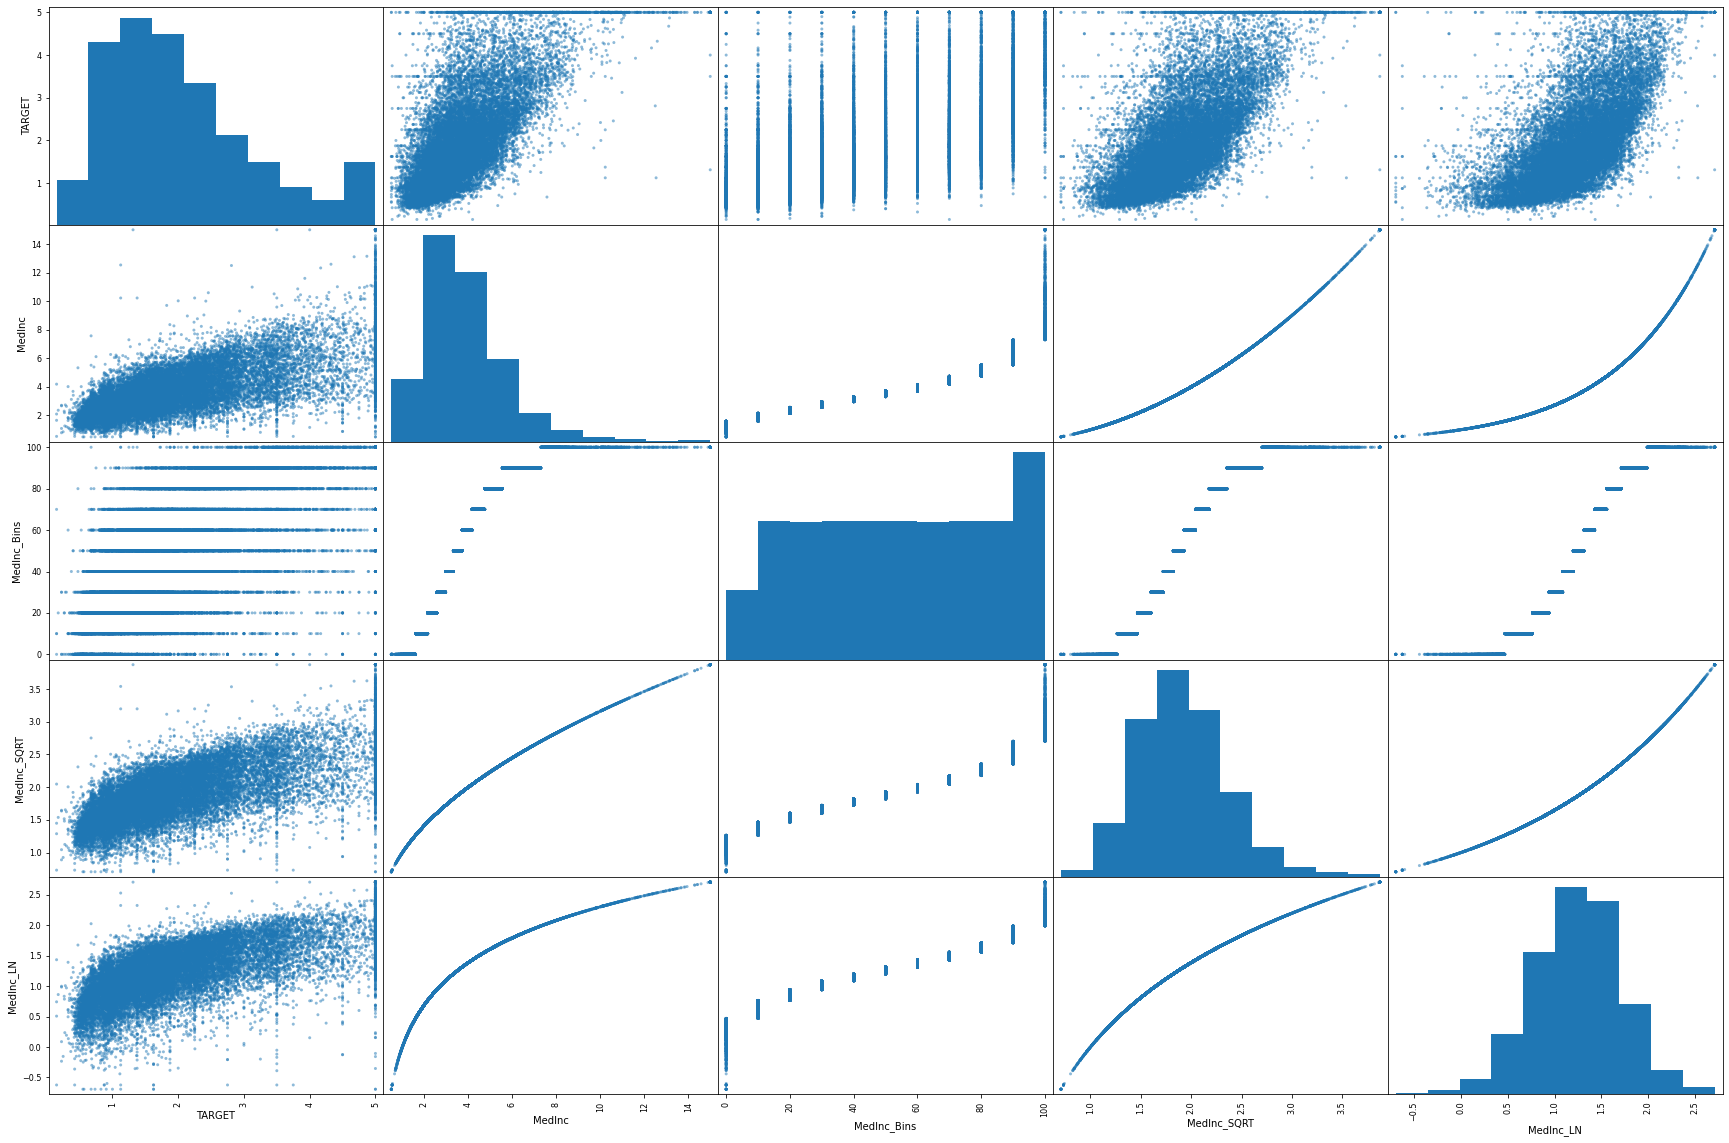

In [7]:
# Plot scatter matrix of all variables
from pandas.plotting import scatter_matrix
attributes = ['TARGET', 'MedInc', 'MedInc_Bins', 'MedInc_SQRT', 'MedInc_LN']
scatter_matrix(housing_df[attributes], figsize = (30, 20))

In [8]:
housing_df

,Latitude,Longitude,ZipCode,MedInc,MedInc_Bins,MedInc_SQRT,MedInc_LN,HouseAge,HouseAge_Bins,HouseAge_SQRT,...,TotalBedrms_LN,TR_Pop,TR_Pop_Bins,TR_Pop_SQRT,TR_Pop_LN,BR_Pop,BR_Pop_Bins,BR_Pop_SQRT,BR_Pop_LN,TARGET
0,-122.23,37.88,94720,8.3252,100,2.885342,2.119287,41,80,6.403124,...,4.859812,2.732919,90,1.653154,1.005370,0.400621,60,0.632946,-0.914739,4.526
1,-122.22,37.86,94611,8.3014,100,2.881215,2.116424,21,30,4.582576,...,7.008505,2.956685,100,1.719501,1.084069,0.460641,80,0.678706,-0.775135,3.585
2,-122.24,37.85,94611,7.2574,90,2.693956,1.982022,52,90,7.211103,...,5.247024,2.957661,100,1.719785,1.084399,0.383065,50,0.618922,-0.959552,3.521
3,-122.25,37.85,94611,5.6431,90,2.375521,1.730434,52,90,7.211103,...,5.459586,2.283154,70,1.511011,0.825558,0.421147,70,0.648958,-0.864773,3.413
4,-122.25,37.85,94611,3.8462,60,1.961173,1.347086,52,90,7.211103,...,5.634790,2.879646,90,1.696952,1.057667,0.495575,80,0.703971,-0.702036,3.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,95922,1.5603,0,1.249120,0.444878,25,40,5.000000,...,5.924256,1.970414,50,1.403714,0.678244,0.442604,70,0.665285,-0.815081,0.781
20636,-121.21,39.49,95925,2.5568,20,1.599000,0.938756,18,20,4.242641,...,5.010635,1.957865,50,1.399237,0.671855,0.421348,70,0.649113,-0.864295,0.771
20637,-121.22,39.43,95925,1.7000,10,1.303840,0.530628,17,20,4.123106,...,6.184149,2.238332,70,1.496106,0.805731,0.481629,80,0.693995,-0.730582,0.923
20638,-121.32,39.43,95972,1.8672,10,1.366455,0.624440,18,20,4.242641,...,6.013715,2.510121,90,1.584336,0.920331,0.551957,90,0.742938,-0.594285,0.847


In [9]:
# Create dataframe for X object
housing_X_df = housing_df
housing_X_df = housing_X_df.drop('TARGET', axis = 1, inplace = False)
housing_X_df

,Latitude,Longitude,ZipCode,MedInc,MedInc_Bins,MedInc_SQRT,MedInc_LN,HouseAge,HouseAge_Bins,HouseAge_SQRT,...,TotalBedrms_SQRT,TotalBedrms_LN,TR_Pop,TR_Pop_Bins,TR_Pop_SQRT,TR_Pop_LN,BR_Pop,BR_Pop_Bins,BR_Pop_SQRT,BR_Pop_LN
0,-122.23,37.88,94720,8.3252,100,2.885342,2.119287,41,80,6.403124,...,11.357817,4.859812,2.732919,90,1.653154,1.005370,0.400621,60,0.632946,-0.914739
1,-122.22,37.86,94611,8.3014,100,2.881215,2.116424,21,30,4.582576,...,33.256578,7.008505,2.956685,100,1.719501,1.084069,0.460641,80,0.678706,-0.775135
2,-122.24,37.85,94611,7.2574,90,2.693956,1.982022,52,90,7.211103,...,13.784049,5.247024,2.957661,100,1.719785,1.084399,0.383065,50,0.618922,-0.959552
3,-122.25,37.85,94611,5.6431,90,2.375521,1.730434,52,90,7.211103,...,15.329710,5.459586,2.283154,70,1.511011,0.825558,0.421147,70,0.648958,-0.864773
4,-122.25,37.85,94611,3.8462,60,1.961173,1.347086,52,90,7.211103,...,16.733201,5.634790,2.879646,90,1.696952,1.057667,0.495575,80,0.703971,-0.702036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,95922,1.5603,0,1.249120,0.444878,25,40,5.000000,...,19.339080,5.924256,1.970414,50,1.403714,0.678244,0.442604,70,0.665285,-0.815081
20636,-121.21,39.49,95925,2.5568,20,1.599000,0.938756,18,20,4.242641,...,12.247449,5.010635,1.957865,50,1.399237,0.671855,0.421348,70,0.649113,-0.864295
20637,-121.22,39.43,95925,1.7000,10,1.303840,0.530628,17,20,4.123106,...,22.022716,6.184149,2.238332,70,1.496106,0.805731,0.481629,80,0.693995,-0.730582
20638,-121.32,39.43,95972,1.8672,10,1.366455,0.624440,18,20,4.242641,...,20.223748,6.013715,2.510121,90,1.584336,0.920331,0.551957,90,0.742938,-0.594285


In [10]:
# Create dataframe for y object
housing_y_df = housing_df['TARGET']
housing_y_df

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: TARGET, Length: 20640, dtype: float64

In [11]:
# Create X and y objects
X, y = housing_X_df, housing_y_df
X.shape, y.shape

((20640, 47), (20640,))

In [12]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [13]:
# Import regression metrics to evaluate models
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [14]:
# Import regression models
from time import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor

regressors = [
    LinearRegression(), 
    RANSACRegressor(), 
    KNeighborsRegressor(),
    KNeighborsRegressor(n_neighbors=9, metric='manhattan'),
    SVR(),
    LinearSVR(),
    GaussianProcessRegressor(),
    GradientBoostingRegressor(n_estimators=4100),
    #SVR(kernel='linear'),
]

In [15]:
# Evaluate performance of various regression models
for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    predictions = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Training time: 0.080s
	Prediction time: 0.003s
	Explained variance: 0.6834292637017877
	Mean absolute error: 0.46378857836961085
	R2 score: 0.6834078469628775

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)
	Training time: 0.192s
	Prediction time: 0.002s
	Explained variance: -30784.920984875
	Mean absolute error: 12.156214943371914
	R2 score: -30873.651145107233

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
	Training time: 0.032s
	Prediction time: 0.231s
	Explained variance: 0.6302728977649821
	Mean absolute error: 0.4869

C:\Users\Sudarshan\.conda\envs\housingml\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
	Training time: 80.594s
	Prediction time: 6.475s
	Explained variance: 7.614613872775067e-08
	Mean absolute error: 0.8821504601215016
	R2 score: -0.013803596955932695



C:\Users\Sudarshan\.conda\envs\housingml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
	Training time: 3.374s
	Prediction time: 0.002s
	Explained variance: 0.4643761074144295
	Mean absolute error: 0.8640876808906182
	R2 score: 0.21852576614469388

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
	Training time: 64.993s
	Prediction time: 8.530s
	Explained variance: 0.0
	Mean absolute error: 2.0411126550387597
	R2 score: -3.165618209847123

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
        

In [37]:
# Evaluate scores of GradientBoostingRegressor models with different n_estimators
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
new_regressors = [LinearRegression(),
              GradientBoostingRegressor(n_estimators=850),
              GradientBoostingRegressor(n_estimators=1000),
              ]

for model in new_regressors:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Explained variance: 0.6834292637017877
	Mean absolute error: 0.46378857836961085
	R2 score: 0.6834078469628775

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=850,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
	Explained variance: 0.8360586149052298
	Mean absolute error: 0.30699185008997687
	R2 score: 0.8360542229827183

GradientBoostingRegressor(alpha=0.9, criterion='f

In [39]:
# Evaluate scores of GradientBoostingRegressor models with different n_estimators
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
new_regressors = [GradientBoostingRegressor(n_estimators=1050),
                  GradientBoostingRegressor(n_estimators=1100),
                  GradientBoostingRegressor(n_estimators=1200),
                  GradientBoostingRegressor(n_estimators=1300),
                 ]

for model in new_regressors:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1050,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
	Explained variance: 0.8394026007556753
	Mean absolute error: 0.30330109251233994
	R2 score: 0.839392149852285

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_imp

In [40]:
# Evaluate scores of GradientBoostingRegressor models with different n_estimators
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
new_regressors = [GradientBoostingRegressor(n_estimators=1400),
                  GradientBoostingRegressor(n_estimators=1500),
                  GradientBoostingRegressor(n_estimators=1600),
                  GradientBoostingRegressor(n_estimators=1700),
                 ]

for model in new_regressors:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
	Explained variance: 0.8421265706922418
	Mean absolute error: 0.29939701485600523
	R2 score: 0.8421189909660205

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_im

In [41]:
# Evaluate scores of GradientBoostingRegressor models with different n_estimators
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
new_regressors = [GradientBoostingRegressor(n_estimators=1800),
                  GradientBoostingRegressor(n_estimators=1900),
                  GradientBoostingRegressor(n_estimators=2000),
                  GradientBoostingRegressor(n_estimators=2100),
                 ]

for model in new_regressors:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1800,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
	Explained variance: 0.8432963208086796
	Mean absolute error: 0.29774492447877154
	R2 score: 0.843285811810389

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_imp

In [42]:
# Evaluate scores of GradientBoostingRegressor models with different n_estimators
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
new_regressors = [GradientBoostingRegressor(n_estimators=3000),
                  GradientBoostingRegressor(n_estimators=4000),
                  GradientBoostingRegressor(n_estimators=5000),
                  GradientBoostingRegressor(n_estimators=6000),
                 ]

for model in new_regressors:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
	Explained variance: 0.8432483080089399
	Mean absolute error: 0.29646858632724593
	R2 score: 0.843242750073623

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_imp

In [43]:
# Evaluate scores of GradientBoostingRegressor models with different n_estimators
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
new_regressors = [GradientBoostingRegressor(n_estimators=4100),
                  GradientBoostingRegressor(n_estimators=4200),
                  GradientBoostingRegressor(n_estimators=4300),
                  GradientBoostingRegressor(n_estimators=4400),
                 ]

for model in new_regressors:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
	Explained variance: 0.843682454977509
	Mean absolute error: 0.2960210318682215
	R2 score: 0.8436768046803271

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impu

In [17]:
# Perform model selection using GridSearchCV to pick the best parameters for GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
parameters = {
    'loss': ['ls', 'lad', 'huber'],
    'max_depth': [3, 6, 9],
    'min_samples_leaf': [2, 3, 4],
    'n_estimators': [4100],
    'random_state': [1]
}
grid =  GridSearchCV(GradientBoostingRegressor(), parameters, n_jobs = 4, verbose = 1)
model = grid.fit(X_train, y_train)
model

C:\Users\Sudarshan\.conda\envs\housingml\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 43.6min
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed: 100.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n...ge=None,
                     

In [18]:
# View model selection results
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')
print(model.best_score_)

{'loss': 'huber', 'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 4100, 'random_state': 1} 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False) 

0.840806013020831


In [19]:
# View model selection results
(pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()).T

rank_test_score,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
mean_fit_time,376.861,393.722,352.979,155.466,359.081,356.463,406.491,158.6,160.174,145.364,...,261.552,316.875,435.786,438.629,259.042,419.204,127.253,256.848,127.919,120.677
std_fit_time,1.45954,0.587732,1.10136,0.0877052,1.15502,1.64971,1.84281,2.13436,0.596465,4.04563,...,1.97996,2.96974,2.35229,0.496189,5.93412,5.43134,1.46886,1.71289,1.07315,0.95292
mean_score_time,0.576312,0.604383,0.603053,0.339262,0.597746,0.575633,0.591595,0.333109,0.347246,0.338778,...,0.45013,0.460788,0.682199,0.677854,0.445825,0.642614,0.260142,0.437003,0.25715,0.248668
std_score_time,0.0105723,0.00846286,0.00734384,0.0023905,0.0103658,0.00164544,0.00967715,0.00373193,0.017056,0.00383149,...,0.0110561,0.002534,0.00469958,0.0193444,0.0147048,0.0073434,0.00164497,0.0176762,0.0092814,0.0033898
param_loss,huber,huber,ls,huber,ls,ls,huber,huber,huber,ls,...,lad,ls,lad,lad,lad,lad,lad,lad,lad,lad
param_max_depth,6,6,6,3,6,6,6,3,3,3,...,6,9,9,9,6,9,3,6,3,3
param_min_samples_leaf,4,3,4,4,3,2,2,3,2,4,...,4,2,3,4,3,2,4,2,3,2
param_n_estimators,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100,...,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100
param_random_state,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
params,"{'loss': 'huber', 'max_depth': 6, 'min_samples...","{'loss': 'huber', 'max_depth': 6, 'min_samples...","{'loss': 'ls', 'max_depth': 6, 'min_samples_le...","{'loss': 'huber', 'max_depth': 3, 'min_samples...","{'loss': 'ls', 'max_depth': 6, 'min_samples_le...","{'loss': 'ls', 'max_depth': 6, 'min_samples_le...","{'loss': 'huber', 'max_depth': 6, 'min_samples...","{'loss': 'huber', 'max_depth': 3, 'min_samples...","{'loss': 'huber', 'max_depth': 3, 'min_samples...","{'loss': 'ls', 'max_depth': 3, 'min_samples_le...",...,"{'loss': 'lad', 'max_depth': 6, 'min_samples_l...","{'loss': 'ls', 'max_depth': 9, 'min_samples_le...","{'loss': 'lad', 'max_depth': 9, 'min_samples_l...","{'loss': 'lad', 'max_depth': 9, 'min_samples_l...","{'loss': 'lad', 'max_depth': 6, 'min_samples_l...","{'loss': 'lad', 'max_depth': 9, 'min_samples_l...","{'loss': 'lad', 'max_depth': 3, 'min_samples_l...","{'loss': 'lad', 'max_depth': 6, 'min_samples_l...","{'loss': 'lad', 'max_depth': 3, 'min_samples_l...","{'loss': 'lad', 'max_depth': 3, 'min_samples_l..."


In [20]:
# Evaluate the final model using test set
predictions = model.predict(X_test)
print(model)
print("\tExplained variance:", explained_variance_score(y_test, predictions))
print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
print("\tR2 score:", r2_score(y_test, predictions))
print()

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n...ge=None,
                     

In [21]:
# Evaluate the final model using test set
final_model = model.best_estimator_
predictions = final_model.predict(X_test)
print(final_model)
print("\tExplained variance:", explained_variance_score(y_test, predictions))
print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
print("\tR2 score:", r2_score(y_test, predictions))
print()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
	Explained variance: 0.8478500259532393
	Mean absolute error: 0.2833916740761826
	R2 score: 0.8477235593652276



In [24]:
# Save final model as a pickle file
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model, f)

In [25]:
# Evaluate the pickle model file using test set
with open('model_pickle','rb') as f:
    mp = pickle.load(f)
predictions = mp.predict(X_test)
print("\tR2 score:", r2_score(y_test, predictions))

	R2 score: 0.8477235593652276


In [26]:
# Save final model as a joblib file
from sklearn.externals import joblib
joblib.dump(model,'model_joblib')

C:\Users\Sudarshan\.conda\envs\housingml\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['model_joblib']

In [27]:
# Evaluate the joblib model file using test set
mj = joblib.load('model_joblib')
predictions = mp.predict(X_test)
print("\tR2 score:", r2_score(y_test, predictions))

	R2 score: 0.8477235593652276
